# Longest Common Sequence (LCS)

Given 2 strings, return the length of longest common subsequence between the 2 strings.<br>

str1 : abdgec <br>
str2 : bfdmgjc <br>

Here there are multiple common subsequences : bd, bdc, bdgc. "bdgc" is the longest common subsequence between 2 strings and hence the length of LCS is 4. <br>

## Solution :



Case-1 : Consider the following strings where the first character is same : <br>

str1 : bdgec <br>
str2 : bfdmgjc <br>

If the starting character "b" here for both string is same, then we can just ask recursion to give us the LCS for string starting after the first character "b". <br>


Case-2 : 

str1 : abdgec <br>
str2 : bfdmgjc <br>

Here the first character is not same for both the strings. Therefore we can ask recursion values from 2 sub-cases. <br><br>
Sub-case 1 : Get LCS from 2nd character of 1st string and from 1st character of 2nd string i.e. str1[1:] and str2 <br>
Sub-case 2 : Get LCS from 1st character of 1st string and 2nd character of 2nd string i.e. str1 and str2[1:] <br>

max(sub-case-1 , sub-case-2) will give us the LCS for complete 2 strings. <br><br>

**Recurrence Relation is**

LCS(i,j) = 1 + LCS(i+1, j+1) if str[i]==str[j] <br>
else <br>
LCS(i,j) = max( LCS(i+1, j) , LCS(i, j+1) ) if str[i] != str[j] <br>

In [7]:
def lcs(str1, str2, i, j):
    
    if i == len(str1) or j == len(str2):
        return 0
    
    if str1[i] == str2[j]:
        
        ans = 1+lcs(str1, str2, i+1, j+1)
    
    else:
        ans1 = lcs(str1, str2, i+1, j)
        ans2 = lcs(str1, str2, i, j+1)
        ans = max(ans1, ans2)
    
    return ans

In [10]:
str1 = "abdgec"
str2 = "bfdmgjc"
lcs(str1, str2, 0, 0)

4

# Multiple Overlapping problems exist : Recursive DP required

Just take one of the statment case and try to imagine different recursive calls :<br>
Say we have <br>

**LCS(i,j) = max( LCS(i+1, j) , LCS(i, j+1) )** if str[i] != str[j] <br>

Following would be the overlapping sub-problem recursive calls : <br>

Same colored calls are same recursive calls

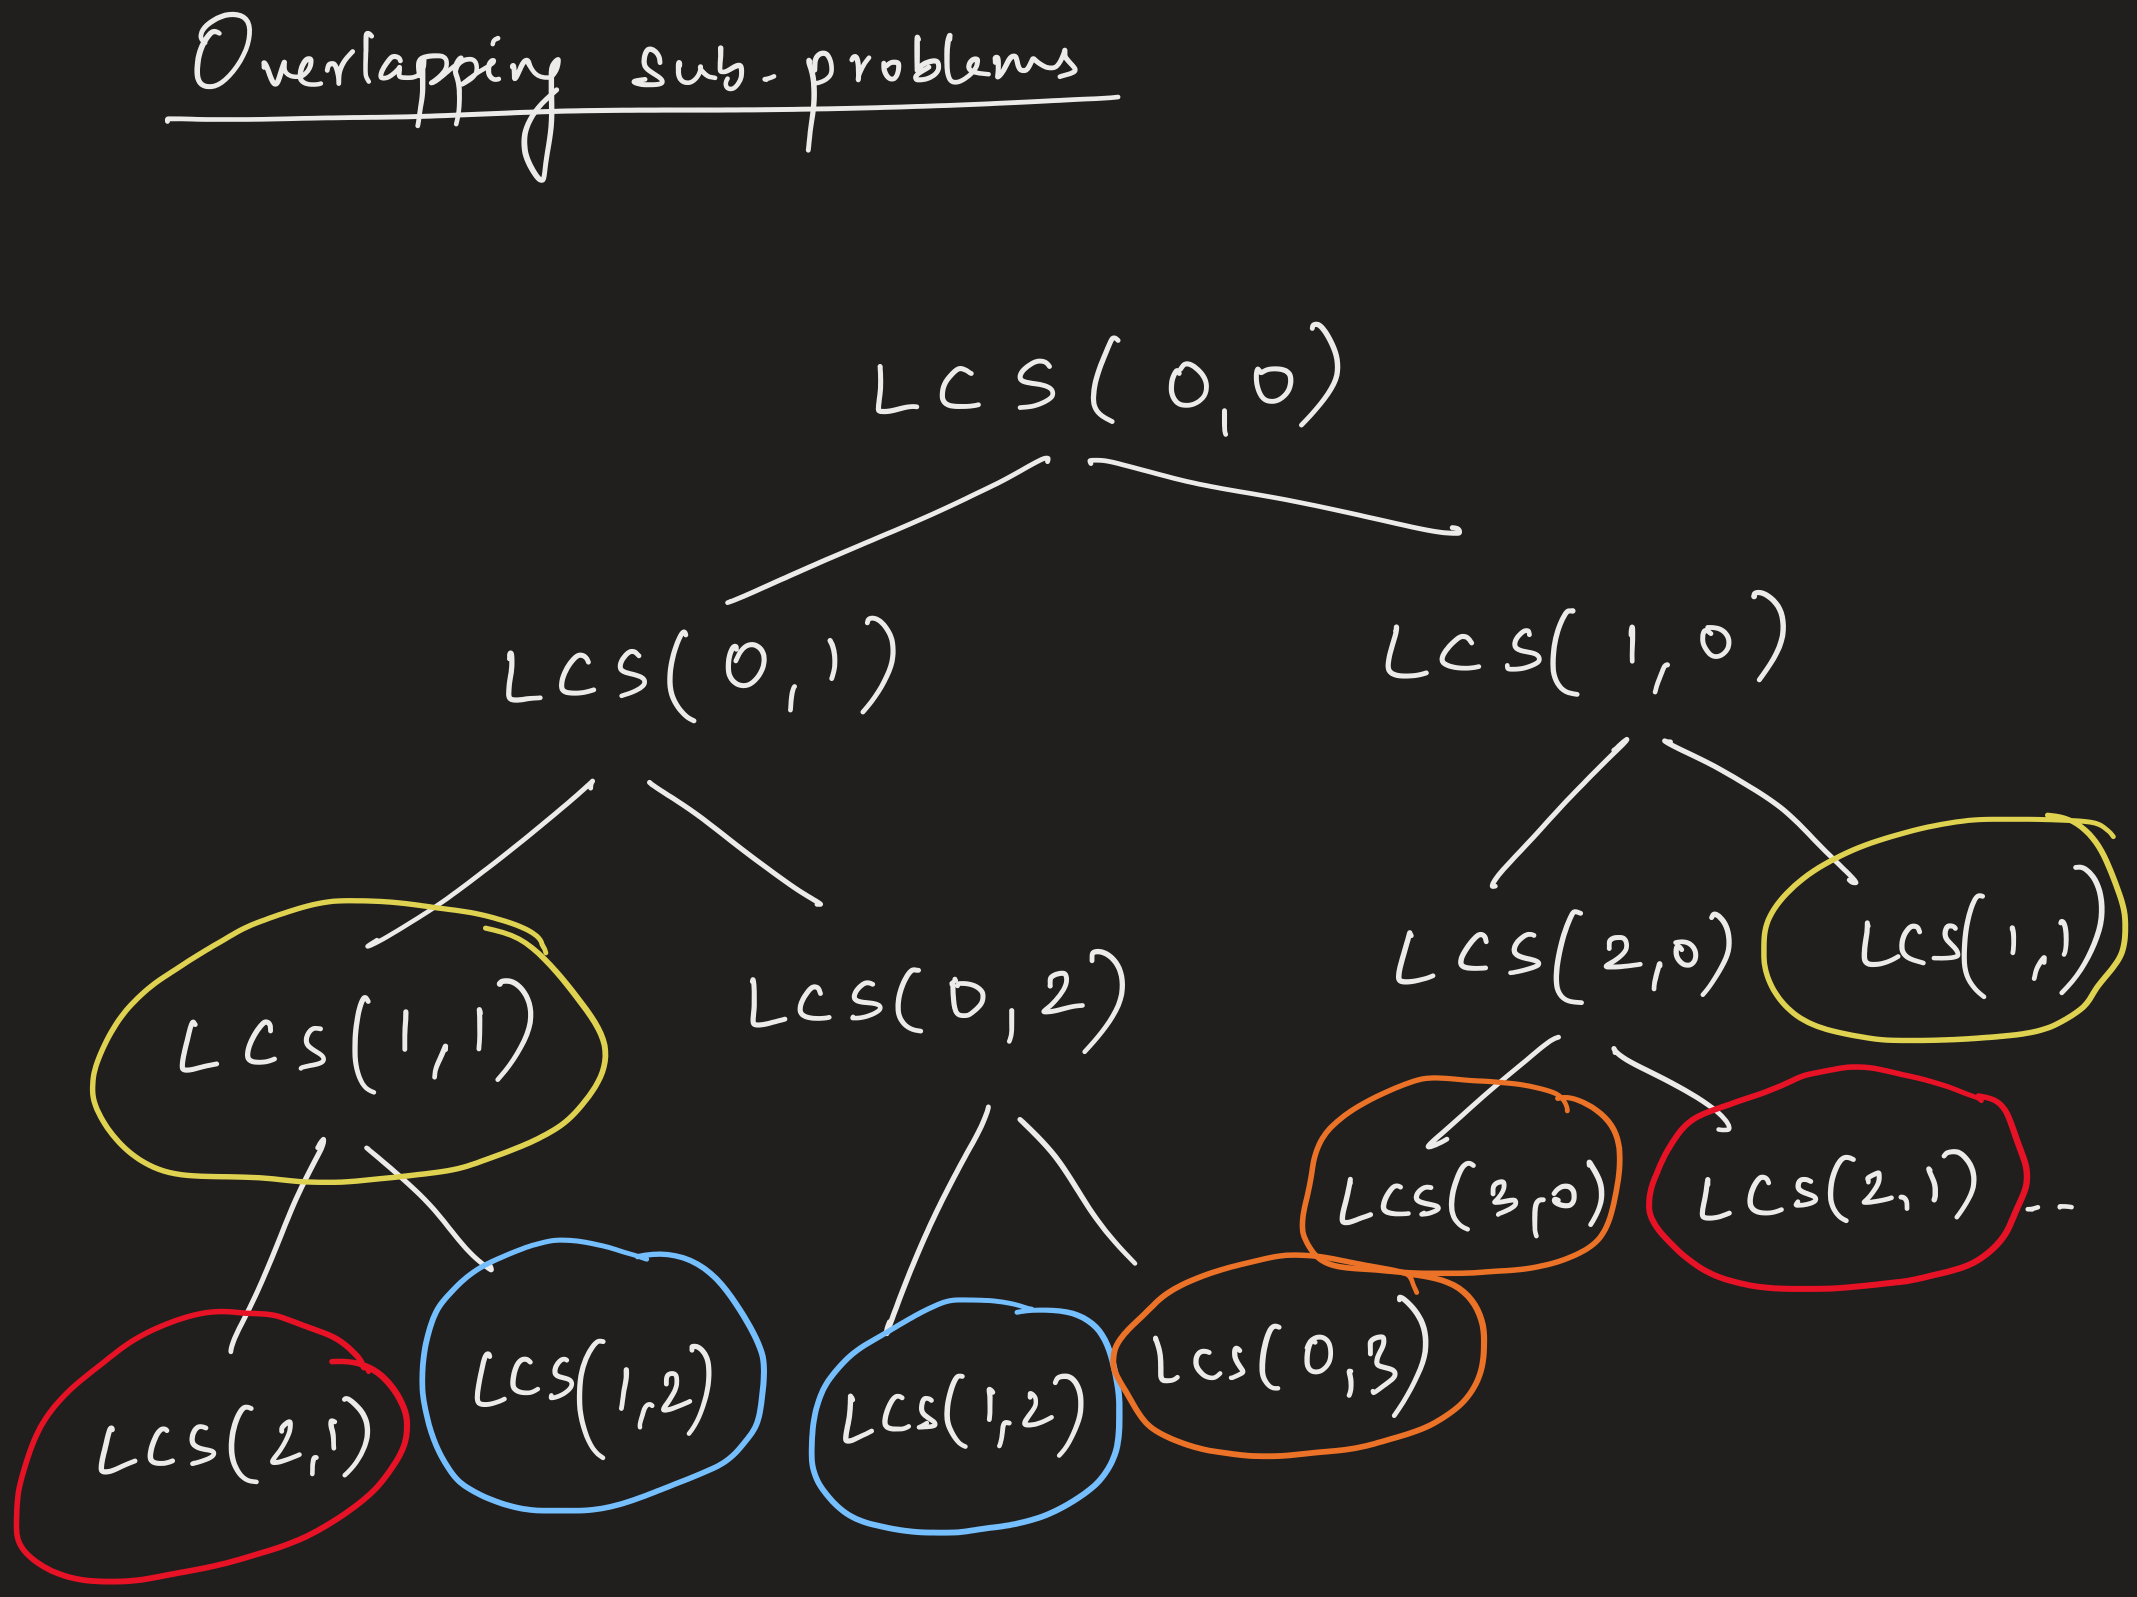

Here we have 2 strings and wherever their characters meet i.e. are same from there onwards there will be a particular unqiue LCS for them. Therefore LCS(i,j) is a unique LCS at each (i,j) for lengths (i to m) and (j to n).<br>

Therefore we will need a 2-D DP array here to store LCS at each (i,j) for memoization.<br>

From here onwards, in the memoization code, wherever you make a recursive call, just make sure you first check for the value in DP array and if it is not there then store it. <br>

To denote that we do not have the value of LCS at this (i,j) we can set all values to -1 in DP array as length cannot be -ve . We do not initialize with 0 because LCS can be 0 and hence we won't know if LCS exist or not to leverage DP.

In [10]:
def lcs_recursive_dp(str1, str2, i, j, dp):
    
    if (i == len(str1)) or (j == len(str2)):
        return 0
    
    if str1[i] == str2[j]:
        
        if dp[i+1][j+1] == -1:
            smallAns = lcs_recursive_dp(str1, str2, i+1, j+1, dp)
            dp[i+1][j+1] = smallAns # As first character for both string is same, we just ask for LCS for str[1:]
            ans = 1 + smallAns # to generate answer including the matching character we add 1.
        else:
            ans = 1 + dp[i+1][j+1]
    
    else:
        if dp[i+1][j] == -1:
            ans1 = lcs_recursive_dp(str1, str2, i+1, j, dp)
            dp[i+1][j] = ans1
        else:
            ans1 = dp[i+1][j]
        
        if dp[i][j+1] == -1:
            ans2 = lcs_recursive_dp(str1, str2, i, j+1, dp)
            dp[i][j+1] = ans2
        else:
            ans2 = dp[i][j+1]
            
        ans = max(ans1, ans2)
    
    return ans

In [11]:
str1 = "adebc"
str2 = "dcadb"
m = len(str1)
n = len(str2)
dp = [[-1 for _ in range(n + 1)] for __ in range(m+1)]

print(lcs_recursive_dp(str1, str2, 0, 0, dp))

3


## Iterative Solution : Bottom Up

In [12]:
def lcs_iterative_dp(str1, str2):
    
    m = len(str1)
    n = len(str2)
    
    # we initialize the DP array with 0 because if one of our string ends then LCS = 0. 
    #This was our BASE-CASE in recursive solution too
    
    # we take DP array of size (m+1)*(n+1) so that we don't have to worry if i+1 or j+1 exist or not
    # and we initilize this extended part of 1 extra row and 1 extra column with 0 so as to act as our base-case
    dp = [[0 for _ in range(n+1) ] for __ in range(n+1)]
    
    for i in range(m-1, -1, -1):
        for j in range(n-1, -1, -1):
            
            if str1[i] == str2[j]:
                
                ans = 1 + dp[i+1][j+1]
                dp[i][j] = ans
            else:
                
                ans1 = dp[i][j+1]
                ans2 = dp[i+1][j]
                
                ans = max(ans1, ans2)
                
                dp[i][j] = ans
                
    return dp[0][0]

In [14]:
str1 = "adebc"
str2 = "dcadb"

lcs_iterative_dp(str1, str2)

3

Below is the logic how the DP array will get filled. See One-note notebook page for more clarity

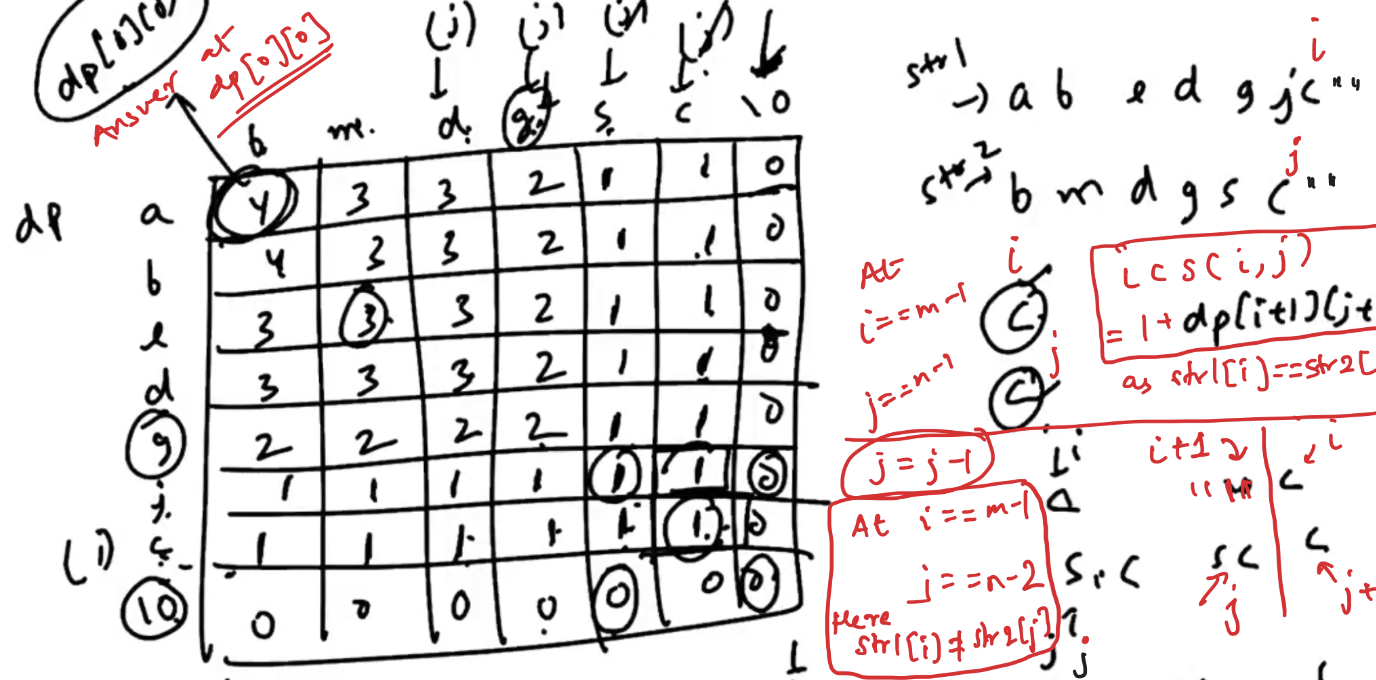